In [107]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load Dataset 

In [108]:
data = pd.read_csv("D:\\DSML\\FINAL PROJECT\\heart_attack_risk_dataset.csv")

# Dataset Information

In [109]:
print("Dataset Information:\n")
data.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  

# Dataset Description

In [110]:
print("\n Dataset Description:\n")
data.describe()


 Dataset Description:



,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


# Missing Values

In [111]:
print("\nMissing Values:\n")
data.isnull().sum()


Missing Values:



Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64

# Visualization

Gender vs Heart Attack Risk  

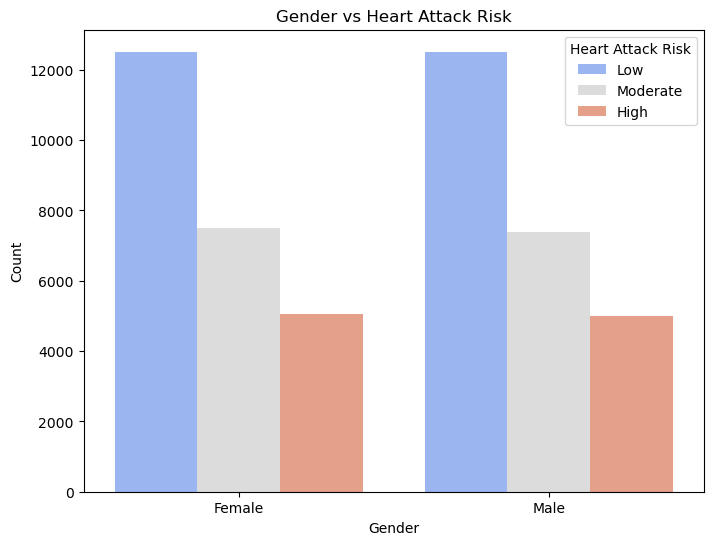

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Heart_Attack_Risk', palette='coolwarm')
plt.title('Gender vs Heart Attack Risk')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', loc='upper right')
plt.show()

Smoking vs Heart Attack Risk

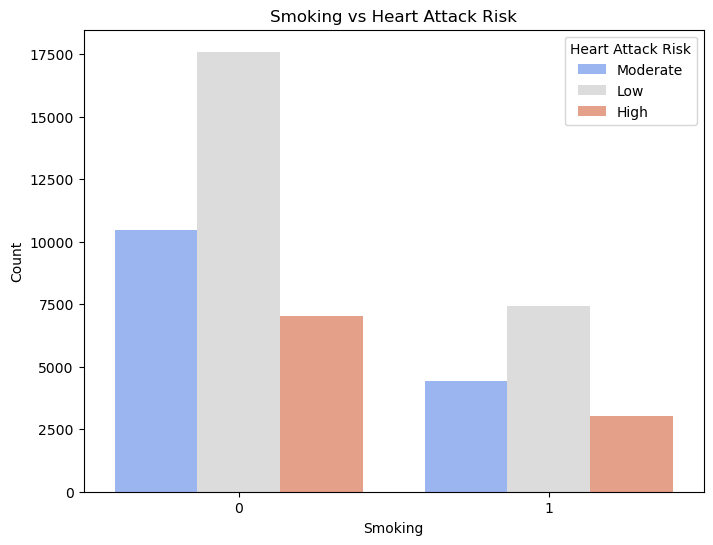

In [113]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Smoking', hue='Heart_Attack_Risk', palette='coolwarm')
plt.title('Smoking vs Heart Attack Risk')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', loc='upper right')
plt.show()

Histogram for numeric columns

In [114]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [115]:
numerical_columns

Index(['Age', 'Smoking', 'Alcohol_Consumption', 'BMI', 'Diabetes',
       'Hypertension', 'Cholesterol_Level', 'Resting_BP', 'Heart_Rate',
       'Family_History', 'Fasting_Blood_Sugar', 'Exercise_Induced_Angina',
       'Max_Heart_Rate_Achieved'],
      dtype='object')

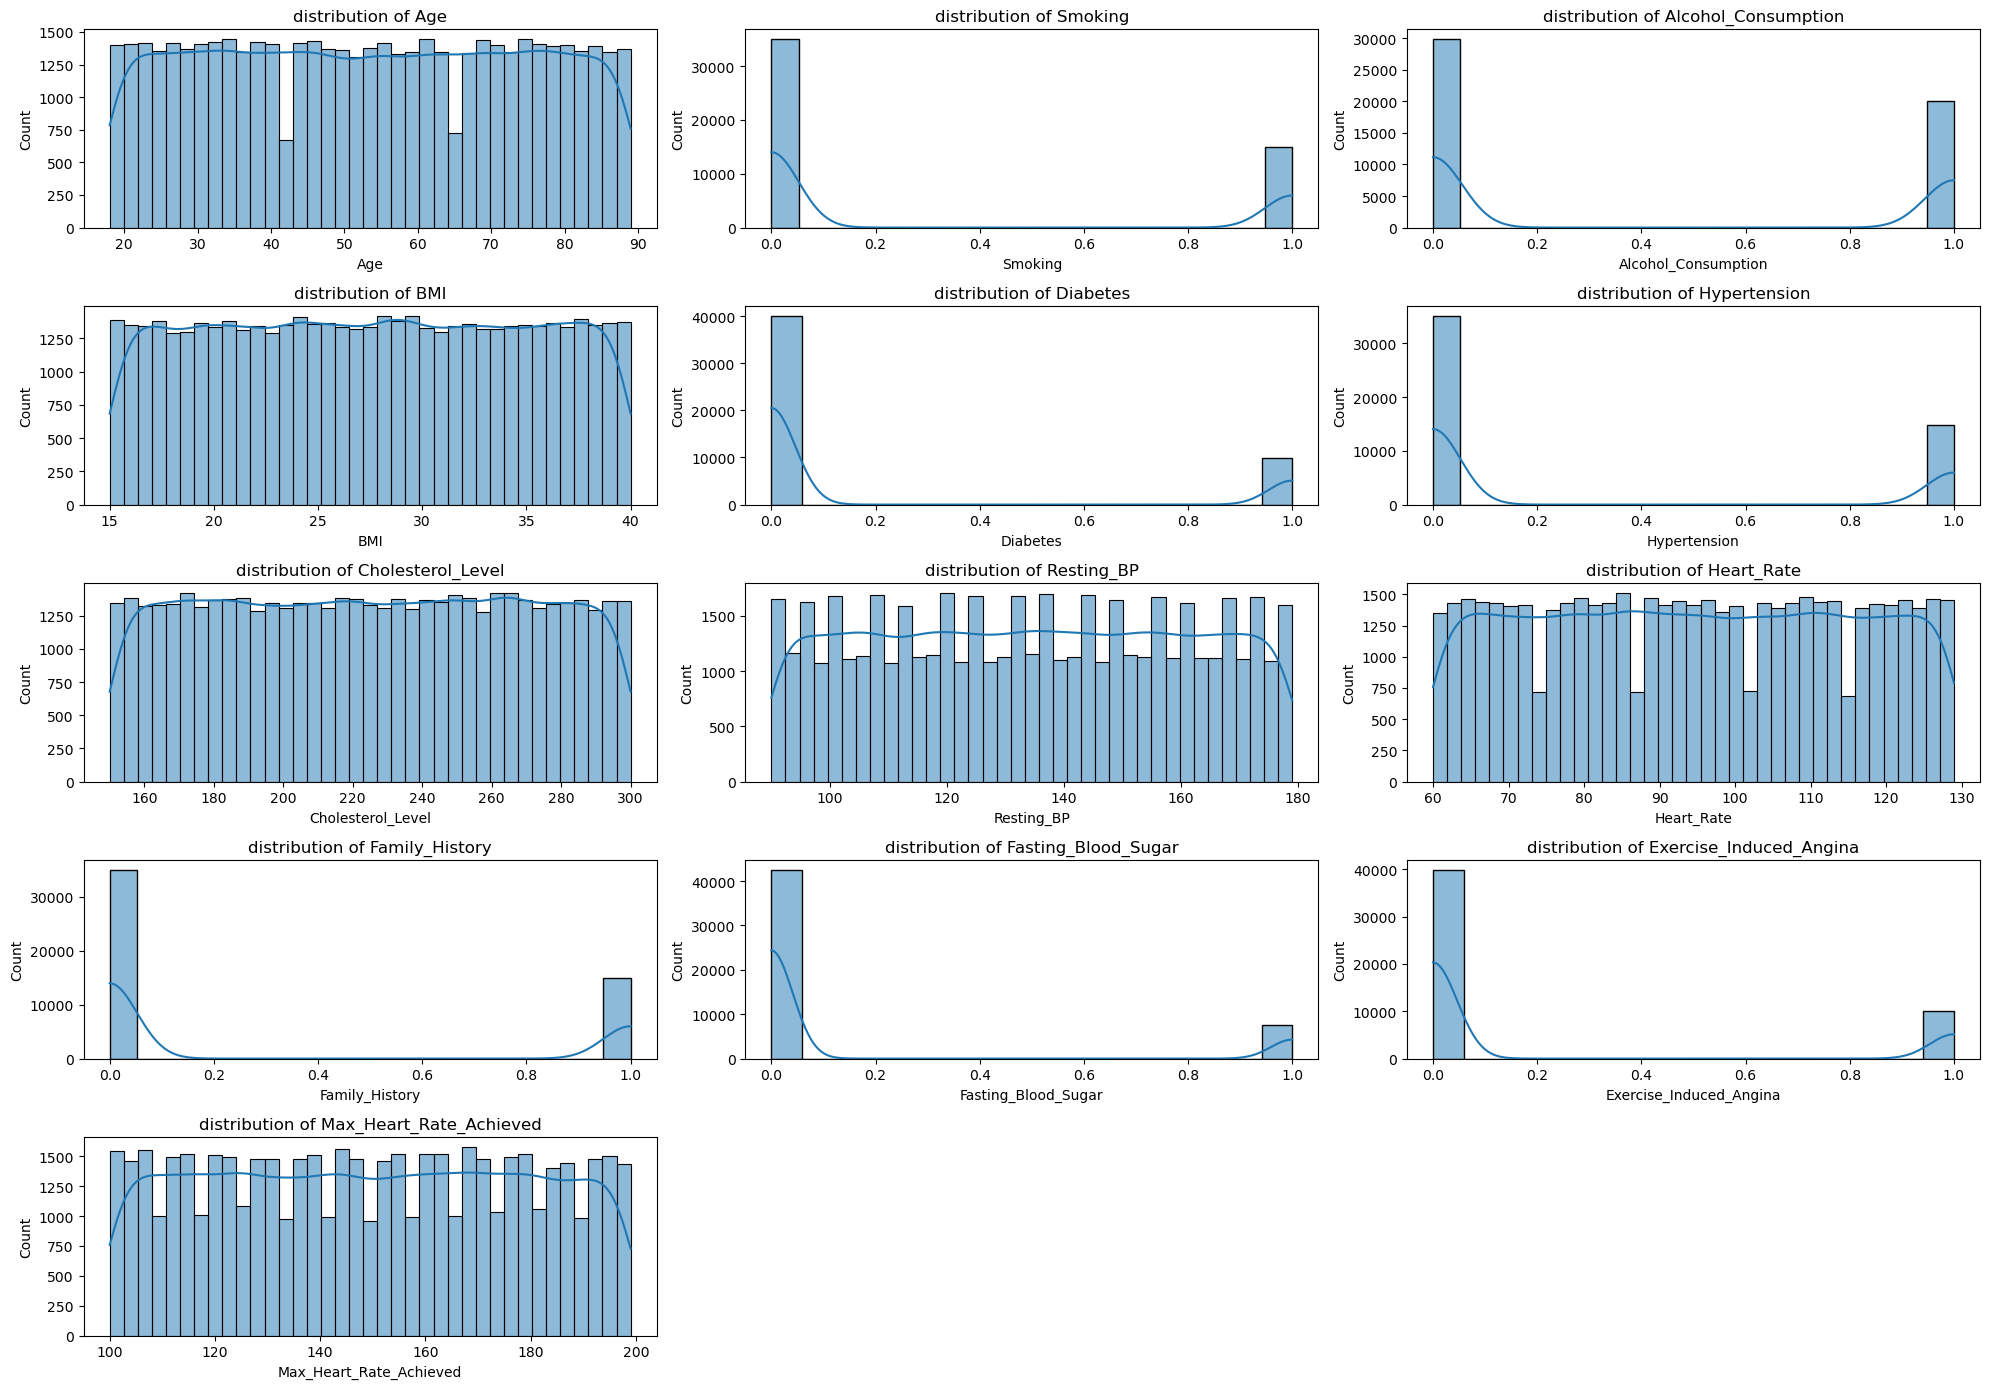

In [116]:
plt.figure(figsize=(20,14))
for i,col in enumerate(numerical_columns,1):
    plt.subplot(5,3,i)
    sns.histplot(data[col],kde=True)
    plt.title(f"distribution of {col}")
plt.tight_layout()
plt.show()

Boxplot of Numeric columns

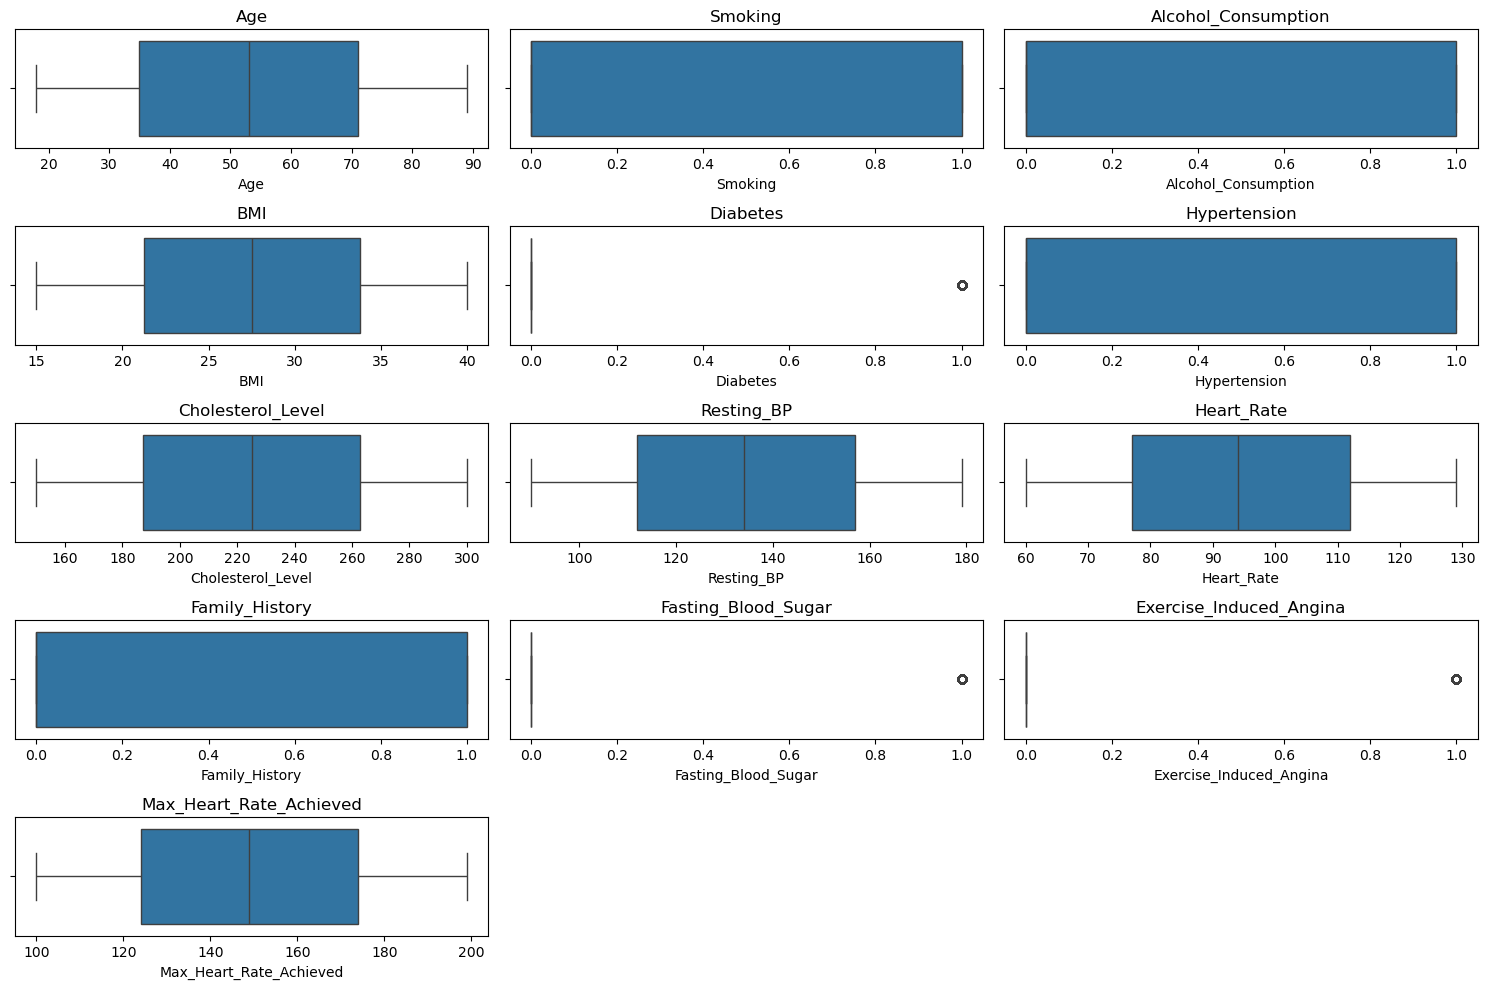

In [117]:

plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_columns,1):
    plt.subplot(5,3,i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Data Preprocessing

In [118]:
label_encoders = {}
label_mapping = {}
for x in categorical_columns:
    Label = LabelEncoder()
    data[x] = Label.fit_transform(data[x])
    label_encoders[col] = Label
    label_mapping[x] = dict(zip(Label.classes_,Label.transform(Label.classes_)))

print("\nLabel Mapping:")
for x, mapping in label_mapping.items():
    print("*"*15)
    print(f"{x} : {mapping}")


Label Mapping:
***************
Gender : {'Female': 0, 'Male': 1}
***************
Physical_Activity_Level : {'High': 0, 'Low': 1, 'Moderate': 2}
***************
Stress_Level : {'High': 0, 'Low': 1, 'Moderate': 2}
***************
Chest_Pain_Type : {'Asymptomatic': 0, 'Atypical': 1, 'Non-anginal': 2, 'Typical': 3}
***************
Thalassemia : {'Fixed defect': 0, 'Normal': 1, 'Reversible defect': 2}
***************
ECG_Results : {'Left Ventricular Hypertrophy': 0, 'Normal': 1, 'ST-T abnormality': 2}
***************
Heart_Attack_Risk : {'High': 0, 'Low': 1, 'Moderate': 2}


In [119]:
data.head(2)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,2,34.61,1,0,152.1,171,85,0,2,2,2,0,1,0,114,1
1,32,1,0,0,2,22.75,0,0,166.8,126,103,0,1,0,1,0,2,0,173,2


In [120]:
data.corr()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
Age,1.000000,-0.003514,-0.010123,-0.000250,0.001932,0.006035,-0.001944,-0.001635,-0.000650,0.003387,-0.004448,-0.001106,0.003926,-0.000664,-0.006925,0.000128,0.003594,0.002802,-0.007056,-0.001509
Gender,-0.003514,1.000000,0.007270,-0.002768,0.012247,0.006171,0.000812,-0.001394,0.009317,-0.004651,-0.002634,-0.005643,-0.004472,0.005784,-0.000011,0.009297,-0.002326,0.001031,0.003898,-0.001411
Smoking,-0.010123,0.007270,1.000000,0.001877,0.007381,-0.002649,-0.003164,-0.000689,-0.004103,-0.004969,-0.004322,-0.001561,-0.005567,0.002046,-0.000829,0.001766,0.001031,0.006028,0.005646,-0.002558
Alcohol_Consumption,-0.000250,-0.002768,0.001877,1.000000,0.000027,0.000199,-0.001174,-0.001342,-0.003098,0.004930,0.002849,0.001287,0.003622,0.001542,0.003558,-0.001257,-0.004673,0.002668,0.001785,-0.000662
Physical_Activity_Level,0.001932,0.012247,0.007381,0.000027,1.000000,0.003918,0.001667,-0.000724,-0.002010,0.005217,-0.000412,-0.002926,-0.010989,0.001816,-0.000491,0.002935,0.005397,0.005985,0.006603,-0.001496
BMI,0.006035,0.006171,-0.002649,0.000199,0.003918,1.000000,-0.000062,0.001564,0.005346,-0.000864,-0.009769,-0.001644,0.000380,0.003045,-0.003712,0.002819,-0.003312,-0.004930,0.005871,0.000498
Diabetes,-0.001944,0.000812,-0.003164,-0.001174,0.001667,-0.000062,1.000000,-0.001157,0.000933,0.007476,0.004813,0.001751,-0.002350,-0.004647,0.000331,-0.006317,0.000460,0.006531,-0.001475,0.003450
Hypertension,-0.001635,-0.001394,-0.000689,-0.001342,-0.000724,0.001564,-0.001157,1.000000,-0.003229,-0.005184,-0.002080,-0.001217,-0.009411,0.003278,-0.007854,0.005667,-0.003582,0.003797,-0.001779,0.012003
Cholesterol_Level,-0.000650,0.009317,-0.004103,-0.003098,-0.002010,0.005346,0.000933,-0.003229,1.000000,-0.008222,-0.003920,-0.000360,-0.000930,-0.006347,0.000664,0.001237,-0.007867,0.007819,0.008641,0.001776
Resting_BP,0.003387,-0.004651,-0.004969,0.004930,0.005217,-0.000864,0.007476,-0.005184,-0.008222,1.000000,-0.003167,0.000962,-0.004128,0.000979,0.002916,0.012131,-0.003282,0.008259,0.006163,0.000193


Correlation Matrix

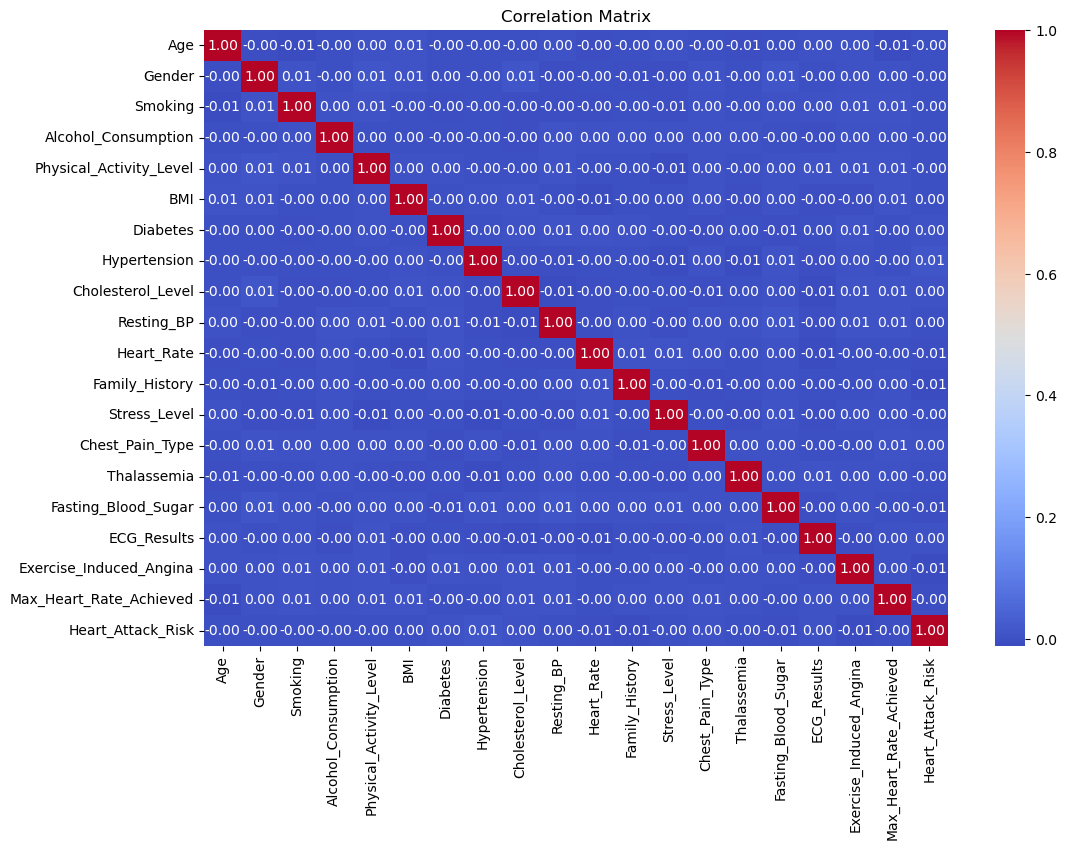

In [121]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()